# N-Body Project
## By: Christian Ivanov 260808189

In [1005]:
import numpy as np
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from matplotlib import animation

In [1187]:
def Green_func_fourrier(n,G,soft):
    a1 = np.arange(n//2+1)
    a2 = a1[::-1][:-1]
    a = np.concatenate((a2,a1[:-1]))
    x = np.array([a]*n)
    y = np.transpose(x)
    Green_func = G/(4*np.pi*np.sqrt((x**2+y**2+soft)))
    return np.fft.fft2(Green_func)

In [1242]:
def take_step_periodic(n,npart,pos,vel,m,Gk,dt):
    rho=np.histogram2d(pos[0]%n,pos[1]%n,bins=n,range=[[0, n], [0, n]],weights=m)[0]
    pot = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fft2(rho)*Gk)))
    F = np.gradient(pot)
    pos=(pos+(vel*dt))%n
    vel[0]=vel[0]+dt*F[0][pos[0].astype(int),pos[1].astype(int)]/m
    vel[1]=vel[1]+dt*F[1][pos[0].astype(int),pos[1].astype(int)]/m
    E = np.sum(0.5*(m*(vel[0]**2+vel[1]**2))-0.5*np.sum(pot))
    return pot,rho,pos,vel,E

In [1223]:
def take_step_periodic_better(n,npart,pos,vel,m,Gk,dt):
    rho=np.histogram2d(pos[0]%n,pos[1]%n,bins=n,range=[[0, n], [0, n]],weights=m)[0]
    pot = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fft2(rho)*Gk)))
    F = np.gradient(pot)
    
    pos_trial = (pos+(vel*dt))%n
    
    rho_trial = np.histogram2d(pos_trial[0]%n,pos_trial[1]%n,bins=n,range=[[0, n], [0, n]],weights=m)[0]
    pot_trial = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fft2(rho_trial)*Gk)))
    F_trial = np.gradient(pot_trial)
    
    F_avg = F+F_trial

    vel[0]=vel[0]+dt*0.5*F_avg[0][pos[0].astype(int),pos[1].astype(int)]/m
    vel[1]=vel[1]+dt*0.5*F_avg[1][pos[0].astype(int),pos[1].astype(int)]/m
    
    pos = (pos+(vel*dt))%n

    E = np.sum(0.5*(m*(vel[0]**2+vel[1]**2))-0.5*np.sum(pot))
    return pot,rho,pos,vel,E

In [1224]:
def take_step_periodic_leapfrog(n,npart,pos,vel,m,Gk,dt):
    rho=np.histogram2d(pos[0]%n,pos[1]%n,bins=n,range=[[0, n], [0, n]],weights=m)[0]
    pot = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fft2(rho)*Gk)))
    F = np.gradient(pot)
    
    pos_old = pos.copy()
    
    pos_trial = np.zeros((2,npart))
    pos_trial[0] = (pos[0]+vel[0]*dt+0.5*(dt**2)*F[0][pos[0].astype(int),pos[1].astype(int)]/m)%n
    pos_trial[1] = (pos[1]+vel[1]*dt+0.5*(dt**2)*F[1][pos[0].astype(int),pos[1].astype(int)]/m)%n
    
    rho_trial = np.histogram2d(pos_trial[0]%n,pos_trial[1]%n,bins=n,range=[[0, n], [0, n]],weights=m)[0]
    pot_trial = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fft2(rho_trial)*Gk)))
    F_trial = np.gradient(pot_trial)
    F_avg = F+F_trial
    
    pos[0] = (pos[0]+vel[0]*dt+0.25*(dt**2)*F_avg[0][pos[0].astype(int),pos[1].astype(int)]/m)%n
    pos[1] = (pos[1]+vel[1]*dt+0.25*(dt**2)*F_avg[1][pos[0].astype(int),pos[1].astype(int)]/m)%n
    
    vel[0]=vel[0]+dt*0.5*F_avg[0][pos_old[0].astype(int),pos_old[1].astype(int)]/m
    vel[1]=vel[1]+dt*0.5*F_avg[1][pos_old[0].astype(int),pos_old[1].astype(int)]/m
    
    E = np.sum(0.5*(m*(vel[0]**2+vel[1]**2))-0.5*np.sum(pot))
    return pot,rho,pos,vel,E

## Part 1

In [1243]:
n = 256
npart = 1
dt = 0.1

m = np.ones(npart)
pos = np.array([[n/2],[n/2]])
vel = np.array([[0.0],[0.0]])


softening = 0.5
G = 1
Gk = Green_func_fourrier(n,G,softening)

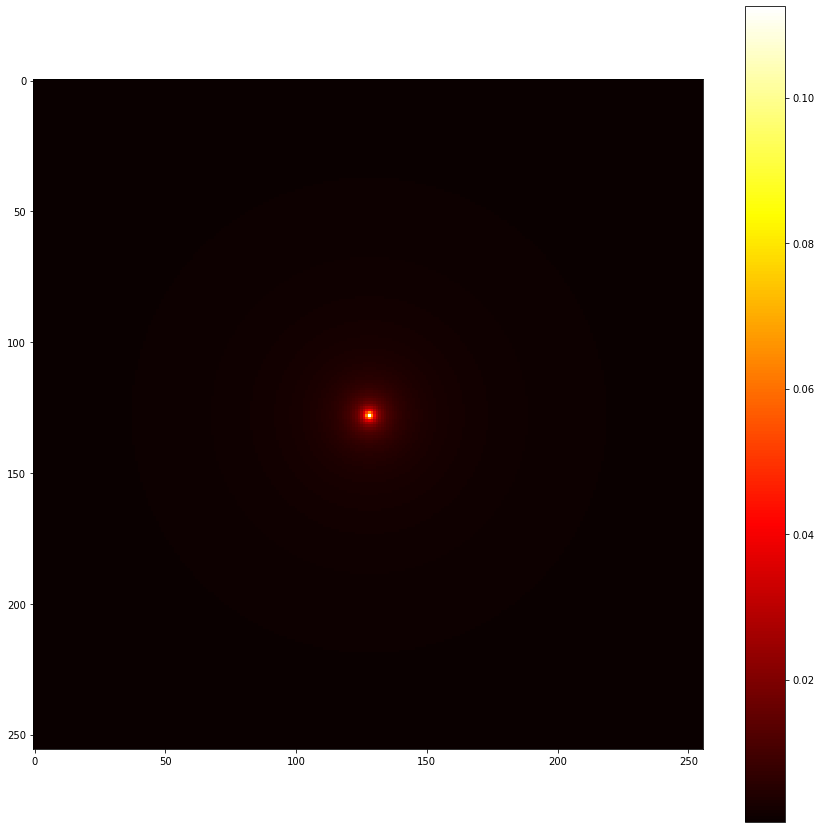

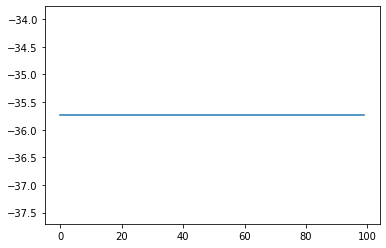

In [1244]:
nruns = 100
E=[]
for j in range(runs):
    
    pot,rho,pos,vel,Ei = take_step_periodic(n,npart,pos,vel,m,Gk,dt)
    E.append(Ei)
    clear_output(wait = True)
    plt.figure(figsize=[15,15])
    plt.imshow(pot,cmap = plt.cm.hot)
    plt.colorbar()
    plt.show()
    plt.pause(0.0001)
plt.plot(E)
plt.show()

## Part 2

In [1245]:
n = 256
npart = 2
dt = 0.1

m = np.ones(npart)
pos = np.array([[n/2,n/2],[7*n/16,9*n/16]])
vel = np.array([[7,-7],[0.0,0.0]])

softening = 0.5
G = 40000
Gk = Green_func_fourrier(n,G,softening)

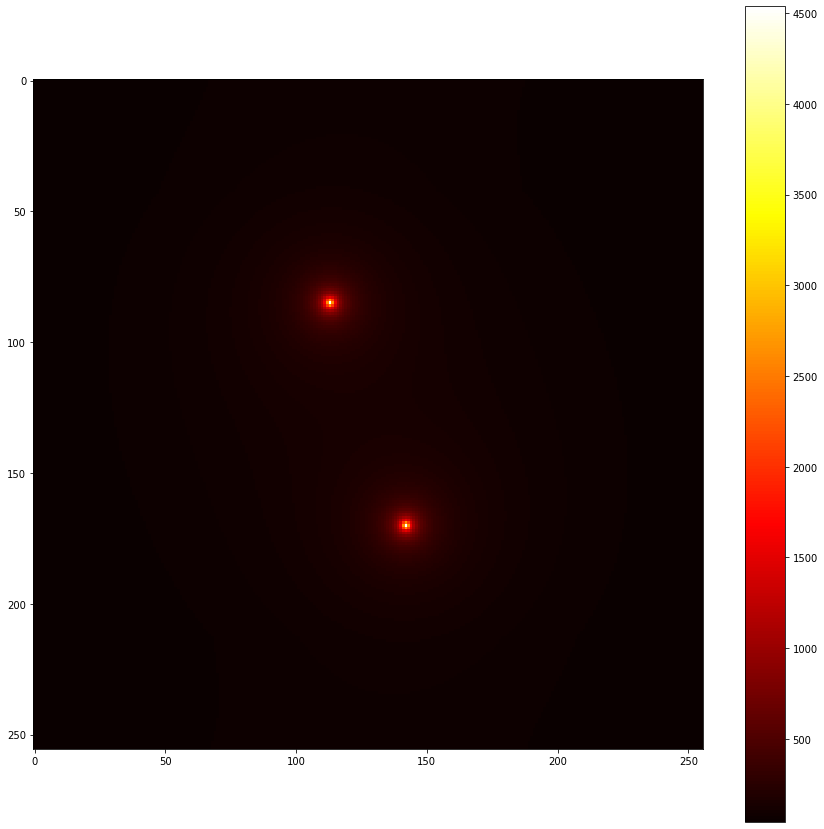

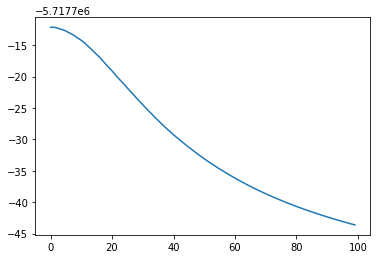

In [1246]:
nruns = 100
E=[]
for j in range(runs):
    
    pot,rho,pos,vel,Ei = take_step_periodic_leapfrog(n,npart,pos,vel,m,Gk,dt)
    E.append(Ei)
    clear_output(wait = True)
    plt.figure(figsize=[15,15])
    plt.imshow(pot,cmap = plt.cm.hot)
    plt.colorbar()
    plt.show()
    plt.pause(0.0001)
plt.plot(E)
plt.show()

## Part 3
### Periodic

In [1252]:
n = 1024
npart = 1000000
dt = 1
m = 0.0001*np.ones(npart)
pos = n*np.random.rand(2,npart)
vel = np.zeros((2,npart))
softening = 0.5
G = 1
Gk = Green_func_fourrier(n,G,softening)

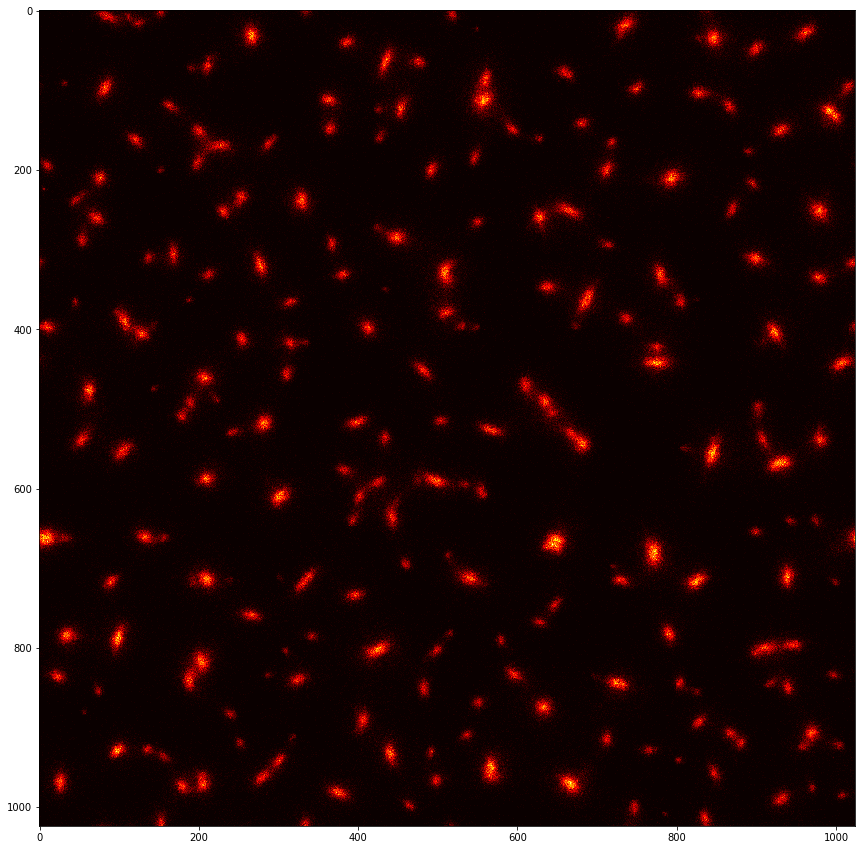

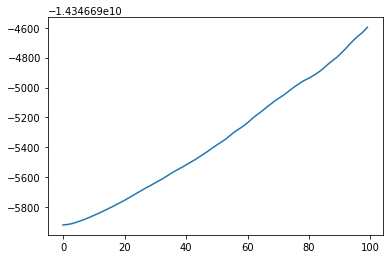

In [1253]:
nruns = 100
E=[]
for j in range(runs):
    
    pot,rho,pos,vel,Ei = take_step_periodic(n,npart,pos,vel,m,Gk,dt)
    E.append(Ei)
    clear_output(wait = True)
    plt.figure(figsize=[15,15])
    plt.imshow(rho,cmap = plt.cm.hot)
    #plt.clim(0,20)
    plt.show()
    plt.pause(0.0001)
plt.plot(E)
plt.show()

## part 4

In [1087]:
n = 1024
npart = n**2
dt = 1
m = np.ones(npart)
m[npart//2+n//2]=1.0000000001
#pos = n*np.random.rand(2,npart)
a = np.meshgrid(np.arange(n),np.arange(n))
pos = np.array([a[1].flatten(),a[0].flatten()])
vel = np.zeros((2,npart))
softening = 0.5
G = 10
Gk = Green_func_fourrier(n,G,softening)

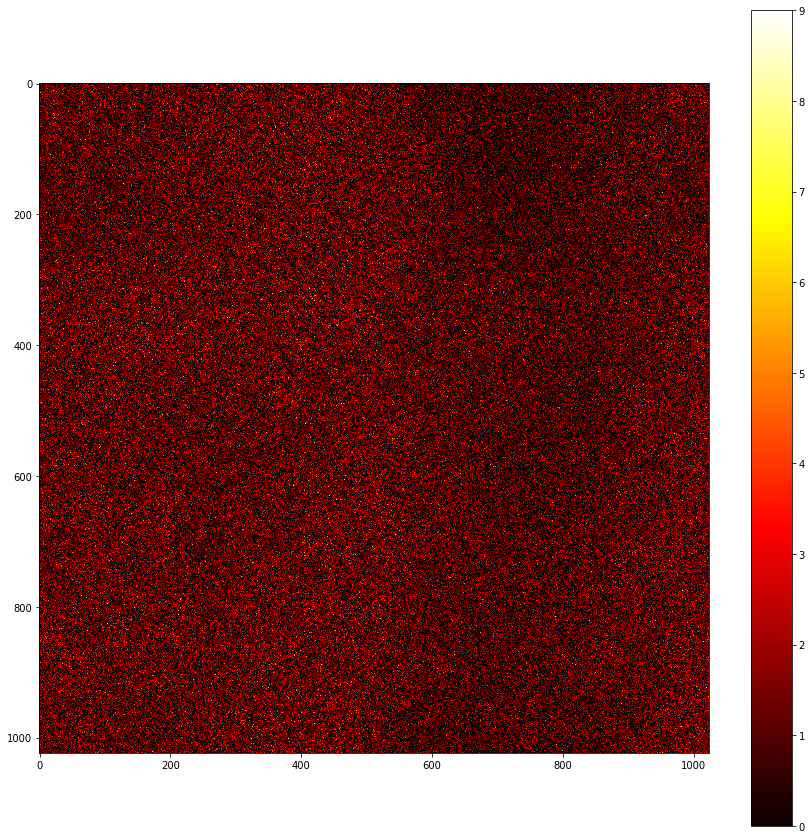

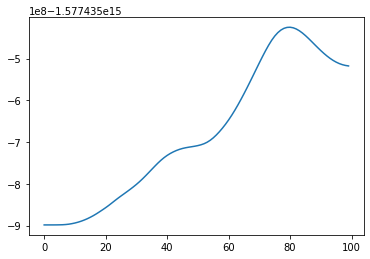

[-1577435898341152.8, -1577435898341152.8, -1577435898336887.8, -1577435898324079.2, -1577435898272756.0, -1577435898131500.0, -1577435897909131.2, -1577435897416204.0, -1577435896585679.8, -1577435895341057.2, -1577435893787449.0, -1577435891837147.5, -1577435889511190.8, -1577435886767165.0, -1577435883633492.0, -1577435880040785.2, -1577435876106553.8, -1577435871733840.5, -1577435866990708.2, -1577435862113948.8, -1577435857072521.2, -1577435851692797.2, -1577435845963749.2, -1577435840151013.2, -1577435834467567.0, -1577435829037306.0, -1577435823756707.2, -1577435818436309.0, -1577435812999855.2, -1577435807340641.5, -1577435801354120.2, -1577435794935848.2, -1577435788026640.5, -1577435780687367.5, -1577435773072163.5, -1577435765364506.2, -1577435757698434.0, -1577435750297629.0, -1577435743448178.8, -1577435737306521.8, -1577435731963434.8, -1577435727392945.0, -1577435723509363.0, -1577435720207660.5, -1577435717484269.5, -1577435715297170.5, -1577435713621201.0, -15774357122

In [1088]:
nruns = 100
E=[]
for j in range(runs):
    
    pot,rho,pos,vel,Ei = take_step_periodic_better(n,npart,pos,vel,m,Gk,dt)
    E.append(Ei)
    clear_output(wait = True)
    plt.figure(figsize=[15,15])
    plt.imshow(rho,cmap = plt.cm.hot)
    plt.colorbar()
    #plt.clim(0,40)
    plt.show()
    plt.pause(0.0001)
plt.plot(E)
plt.show()
print(E)

In [1026]:
n = 1024
npart = n**2
dt = 0.1
m = np.ones(npart)
a = np.meshgrid(np.arange(n),np.arange(n))
pos = np.array([a[1].flatten(),a[0].flatten()])
vel = np.zeros((2,npart))

C:\Users\Christian\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Christian\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Christian\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


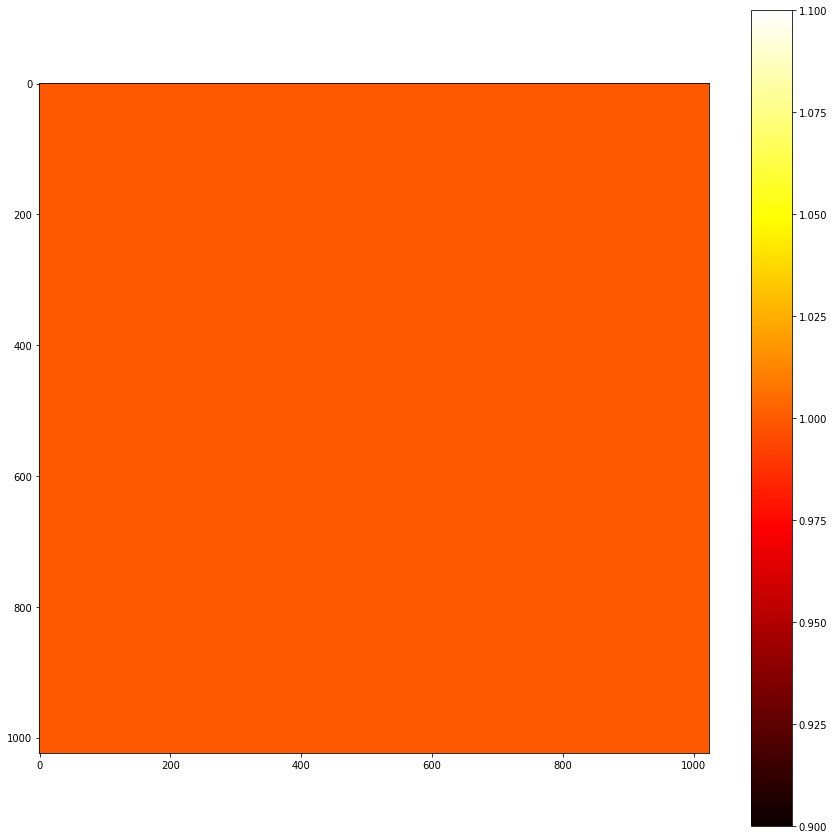

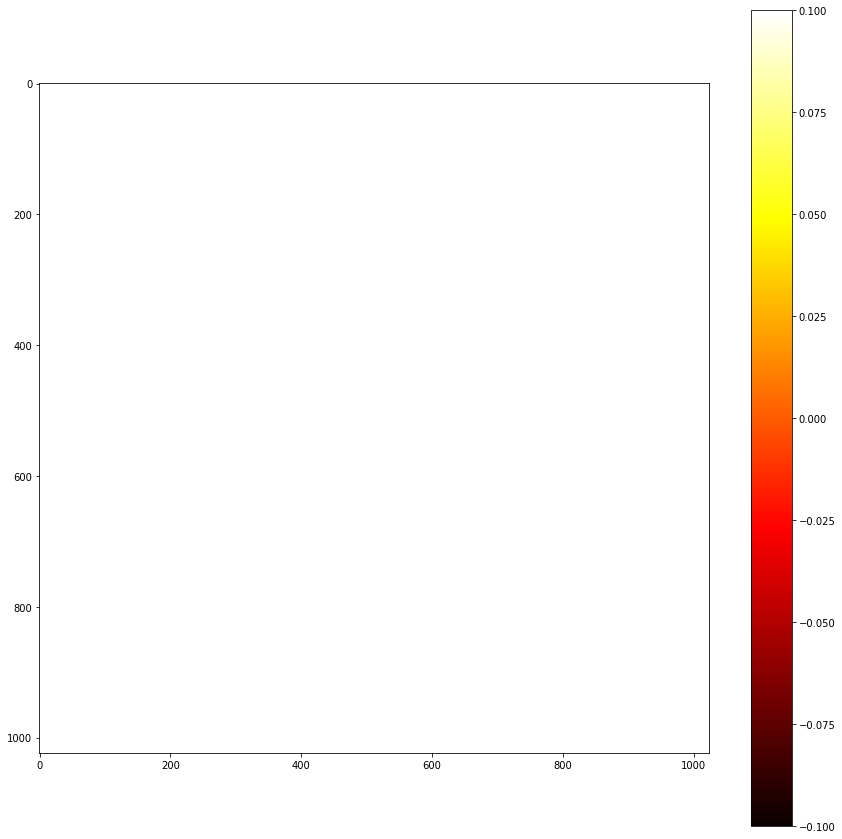

In [1027]:
a = 0.001
rho = np.histogram2d(pos[0]%n,pos[1]%n,bins=n,range=[[0, n], [0, n]],weights=m)[0]
rhok = np.fft.fft2(rho)
rhoabs3 = 1/rhok**3
rho_noisy = rhok + a*(2*np.random.rand(n,n))*rhoabs3
rho_new = np.abs(np.real(np.fft.fftshift(np.fft.ifft2(rho_noisy))))

plt.figure(figsize=[15,15])
plt.imshow(rho,cmap = plt.cm.hot)
plt.colorbar()
plt.show()
plt.figure(figsize=[15,15])
plt.imshow(rho_new,cmap = plt.cm.hot)
plt.colorbar()
plt.show()

In [ ]:
n = 256
npart = 2
dt = 0.1

m = np.ones(npart)
#m[0]=1000
#pos = n*np.random.rand(2,npart)
#pos[0,0]=pos[1,0]=n/2


#vel = np.zeros((2,npart))
#vel[0,0]=vel[1,0]=0

#vel = 10000*np.random.rand(2,npart)-0.5

pos = np.asarray([[n/2,n/2],[7*n/16,9*n/16]])
vel = np.asarray([[7,-7],[0.0,0.0]])

In [891]:
n = 1024
npart = 1000000
dt = 0.1
m = np.ones(npart)
pos = n*np.random.rand(2,npart)
vel = np.zeros((2,npart))
softening = 0.05
G = 1
Gk = Green_func_fourrier(n,G,softening)

In [892]:
def takestep(self):
    global n, npart, pos, vel, m, Gk, dt
    pot,rho,pos,vel,E = take_step_periodic_better(n,npart,pos,vel,m,Gk,dt)
    plt.imshow(rho,cmap = plt.cm.hot)
    plt.clim(0,50)

KeyboardInterrupt: 

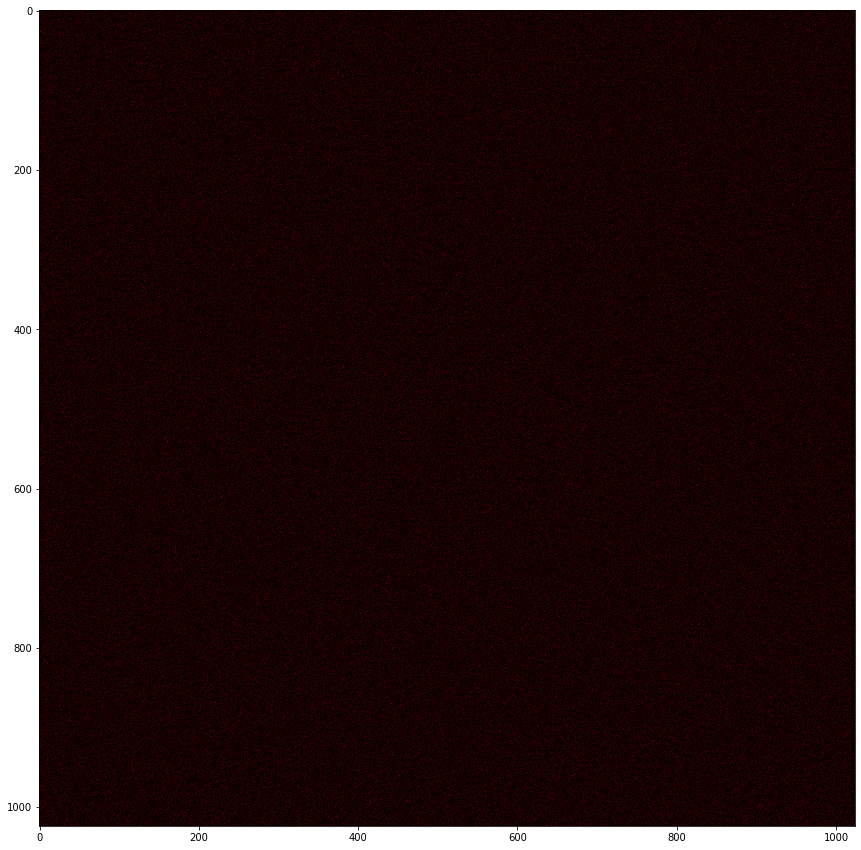

In [893]:
fig = plt.figure(figsize=[15,15])
ani = animation.FuncAnimation(fig,takestep,frames=400,interval=50)
ani.save('Yeetsimus.mp4')